In [4]:
import numpy as np

# Load the training data and labels
train_data = np.load(r'E:\Python\Project7\Kannada_MNIST\X_kannada_MNIST_train.npz')
X_train = train_data['arr_0']

train_labels = np.load(r'E:\Python\Project7\Kannada_MNIST\y_kannada_MNIST_train.npz')
y_train = train_labels['arr_0']

# Load the test data and labels
test_data = np.load(r'E:\Python\Project7\Kannada_MNIST\X_kannada_MNIST_test.npz')
X_test = test_data['arr_0']

test_labels = np.load(r'E:\Python\Project7\Kannada_MNIST\y_kannada_MNIST_test.npz')
y_test = test_labels['arr_0']

# Print the shapes of the loaded data
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
import numpy as np

# Load the npz file
dataset = np.load(r'E:\Python\Project7\Kannada_MNIST\X_kannada_MNIST_train.npz')

# Extract the data
X_train = dataset['arr_0']

# Print the shape of the extracted data
print("Training data shape:", X_train.shape)

Training data shape: (60000, 28, 28)


In [6]:
import matplotlib.pyplot as plt
import matplotlib

In [7]:
some_digit=X_train[90]

In [8]:
some_digit_img=some_digit.reshape(28,28)

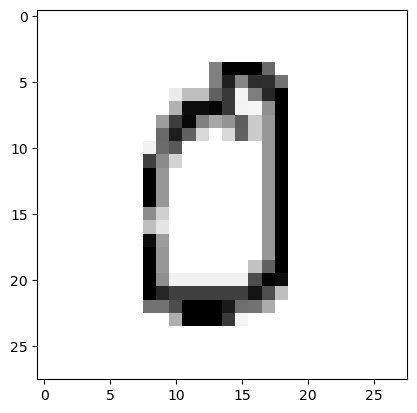

In [9]:
plt.imshow(some_digit_img,cmap=matplotlib.cm.binary,interpolation="nearest")

In [10]:
y_train[90]

0

### Performing PCA to the data

In [11]:
from sklearn.decomposition import  PCA

In [12]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 10 components
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

In [13]:
y_train[1].dtype

dtype('uint8')

#### WRITING A SINGLE FUNCTION TO FIND OUT VARIOUS PARAMETERS

In [14]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score,confusion_matrix

def evaluate_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)

    # Predict labels for the test data
    y_pred = model.predict(x_test)

    # Calculate accuracy, f1-score, and recall
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Calculate ROC-AUC score
    y_pred_proba = model.predict_proba(x_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    ## Calculating Confusion Matrix
    conf_matrix=confusion_matrix(y_test,y_pred)

    # Return evaluation metrics
    return accuracy, f1, recall, roc_auc, conf_matrix

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [16]:
dt_classifier = DecisionTreeClassifier()
dt_precision, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("Decision Tree Confusion Matrix:")
print(dt_confusion_matrix)

Decision Tree Precision: 0.8005
Decision Tree F1-score: 0.7998737551116972
Decision Tree Recall: 0.8005000000000001
Decision Tree ROC-AUC: 0.8891666666666668
Decision Tree Confusion Matrix:
[[724 146  12  44   8   2   0  11  31  22]
 [ 79 806   3  31   6  17   4   7  34  13]
 [  8   4 925   8   8  25  12   7   1   2]
 [ 15  13   8 759  40  35  30  52  25  23]
 [  2   5   1  30 857  48   9   9  17  22]
 [  5  17   8  25 122 783   9   7  11  13]
 [  6   3   5  46  19  28 771  91   8  23]
 [ 12  11   9  61  27   8 137 678  19  38]
 [ 50  24   8  10   2   7   6   1 869  23]
 [ 18  38   1   8  35  10   4   9  44 833]]


In [17]:
rf_classifier = RandomForestClassifier()
rf_precision, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Precision:", rf_precision)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("Random Forest Confusion Matrix")
print(rf_confusion_matrix)

Random Forest Precision: 0.8737
Random Forest F1-score: 0.873042634111395
Random Forest Recall: 0.8737
Random Forest ROC-AUC: 0.9897446277777778
Random Forest Confusion Matrix
[[778 153   2  32   2   0   3   5  18   7]
 [ 32 910   0  24   5   3   0   4  14   8]
 [  4   2 981   2   0   6   0   3   1   1]
 [  8  12   0 881  18  18  10  35  16   2]
 [  0   2   0  29 917  33   2   2   8   7]
 [  0   2   1   9 122 851   4   3   4   4]
 [  2   8   1  52  13  23 827  58   3  13]
 [  6  13   2  43  26   1 130 737  10  32]
 [ 14  13   1   2   2   5   1   0 958   4]
 [  7  10   0   4  18   0   6   5  53 897]]


In [18]:
nb_classifier = GaussianNB()
nb_precision, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("Naive Bayes Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Precision: 0.7726
Naive Bayes F1-score: 0.7712295290678963
Naive Bayes Recall: 0.7726
Naive Bayes ROC-AUC: 0.9722822666666667
Naive Bayes Confusion Matrix:
[[608 229  16  70   8   0   2  13  45   9]
 [ 25 749   9 121   8   2   0   0  65  21]
 [  9   1 967   3   0  15   1   3   1   0]
 [ 13   7   2 844  32  16  21  64   0   1]
 [  1   1   1  38 872  43   1   8  28   7]
 [  0   2  15  47 165 731   6  16  13   5]
 [  5   9  49  30  25  45 730  94   3  10]
 [  9  17   4  80  50   1 176 651   2  10]
 [ 89  36  26   6   4   3   2   4 822   8]
 [ 19  28   1   8  62   0   3  21 106 752]]


In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_precision, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Precision:", knn_precision)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("K-NN Confusion Matrix:")
print(knn_confusion_matrix)

K-NN Precision: 0.8812
K-NN F1-score: 0.8800703751666346
K-NN Recall: 0.8812
K-NN ROC-AUC: 0.9736086277777778
K-NN Confusion Matrix:
[[776 169   1  27   2   0   2   3  14   6]
 [ 18 943   0  16   4   1   0   2  11   5]
 [  6   1 979   3   0   7   1   2   1   0]
 [ 10  12   0 886  20  22   4  15  26   5]
 [  0   1   0  14 953  21   1   2   4   4]
 [  0   3   0   8 116 857   3   3   4   6]
 [  0   6   0  42  21  10 840  67   0  14]
 [  7   8   0  53  34   3 165 698   6  26]
 [ 15   8   2   1   3   6   3   0 959   3]
 [  5   8   0   0  24   0   7   5  30 921]]


In [20]:
svm_classifier = SVC(probability=True)
svm_precision, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Precision:", svm_precision)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)
print("SVM confusion Matrix:")
print(svm_confusion_matrix)

SVM Precision: 0.887
SVM F1-score: 0.8864725246719815
SVM Recall: 0.8869999999999999
SVM ROC-AUC: 0.9924956333333332
SVM confusion Matrix:
[[811 139   1  22   6   0   1   2  15   3]
 [ 19 924   0  27   3   3   0   4  12   8]
 [  3   2 984   1   0   5   0   3   1   1]
 [  8  11   0 887  20  22   8  26  18   0]
 [  0   1   0  14 948  22   0   0   5  10]
 [  0   4   1   4 124 854   3   3   4   3]
 [  0  10   1  50  20  22 844  40   0  13]
 [  6  13   0  33  17   4 135 747   7  38]
 [  8  15   4   0   4   4   3   0 958   4]
 [  2  13   0   0  23   0   6   3  40 913]]


#### AUC,ROC Curve

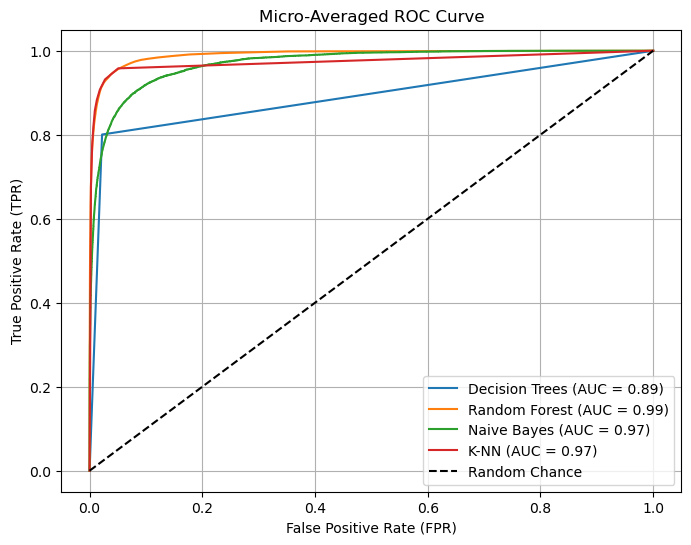

In [21]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_pred_probs = dt_classifier.predict_proba(X_test_pca)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin.ravel(), dt_pred_probs.ravel())
dt_auc = auc(dt_fpr, dt_tpr)

# For Random Forest
rf_pred_probs = rf_classifier.predict_proba(X_test_pca)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin.ravel(), rf_pred_probs.ravel())
rf_auc = auc(rf_fpr, rf_tpr)

# For Naive Bayes
nb_pred_probs = nb_classifier.predict_proba(X_test_pca)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin.ravel(), nb_pred_probs.ravel())
nb_auc = auc(nb_fpr, nb_tpr)

# For K-NN
knn_pred_probs = knn_classifier.predict_proba(X_test_pca)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin.ravel(), knn_pred_probs.ravel())
knn_auc = auc(knn_fpr, knn_tpr)


# Plot micro-averaged ROC curves for each classifier
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label='Decision Trees (AUC = {:.2f})'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUC = {:.2f})'.format(nb_auc))
plt.plot(knn_fpr, knn_tpr, label='K-NN (AUC = {:.2f})'.format(knn_auc))
#plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Micro-Averaged ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

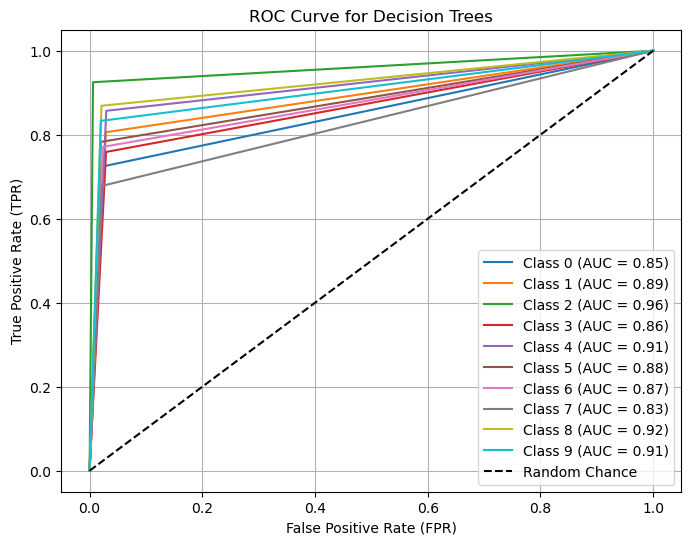

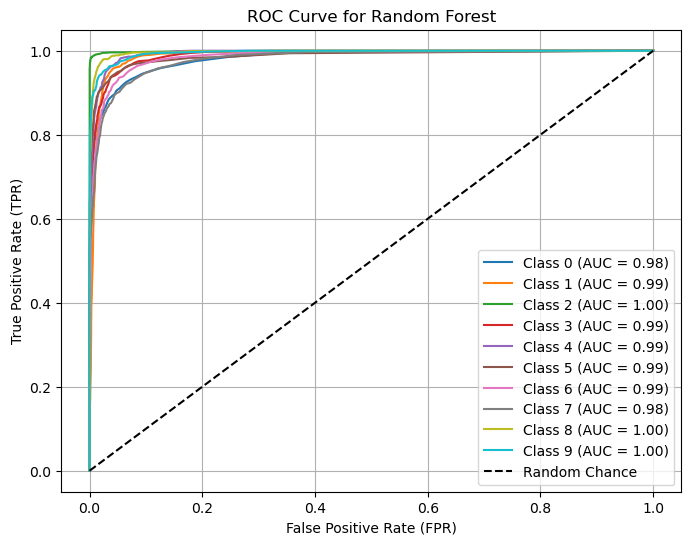

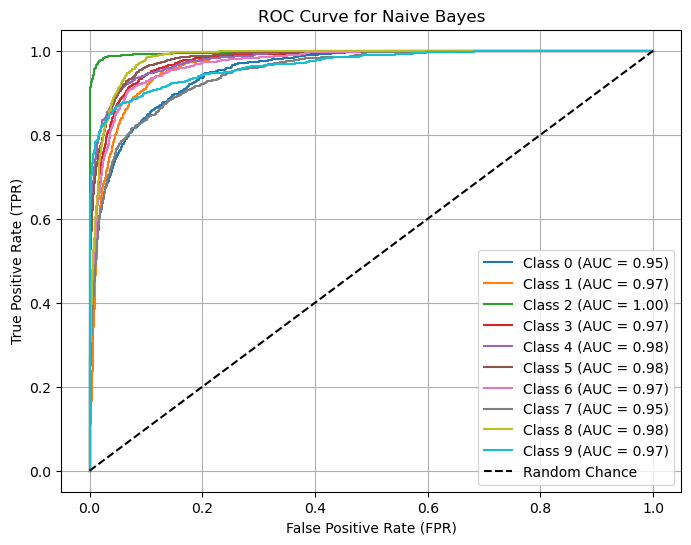

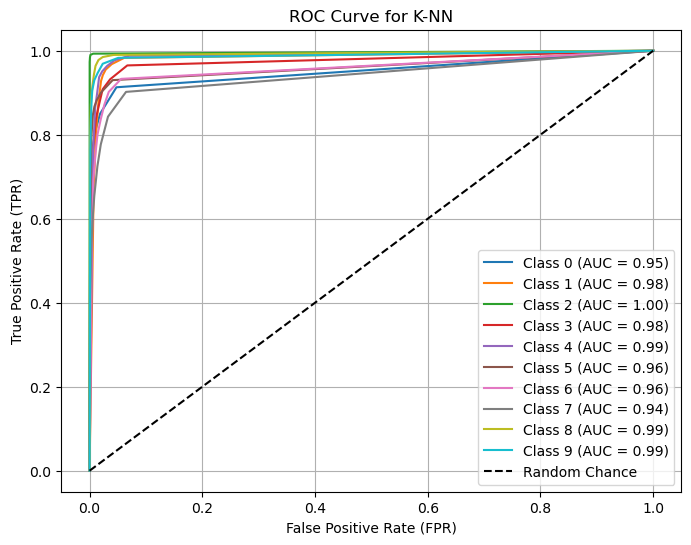

In [22]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert the true labels to one-hot encoded format
y_test_bin = label_binarize(y_test, classes=range(10))

# For Decision Trees
dt_fpr = dict()
dt_tpr = dict()
dt_auc = dict()
for class_idx in range(10):
    dt_pred_probs = dt_classifier.predict_proba(X_test_pca)[:, class_idx]
    dt_fpr[class_idx], dt_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], dt_pred_probs)
    dt_auc[class_idx] = auc(dt_fpr[class_idx], dt_tpr[class_idx])

# For Random Forest
rf_fpr = dict()
rf_tpr = dict()
rf_auc = dict()
for class_idx in range(10):
    rf_pred_probs = rf_classifier.predict_proba(X_test_pca)[:, class_idx]
    rf_fpr[class_idx], rf_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], rf_pred_probs)
    rf_auc[class_idx] = auc(rf_fpr[class_idx], rf_tpr[class_idx])

# For Naive Bayes
nb_fpr = dict()
nb_tpr = dict()
nb_auc = dict()
for class_idx in range(10):
    nb_pred_probs = nb_classifier.predict_proba(X_test_pca)[:, class_idx]
    nb_fpr[class_idx], nb_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], nb_pred_probs)
    nb_auc[class_idx] = auc(nb_fpr[class_idx], nb_tpr[class_idx])

# For K-NN
knn_fpr = dict()
knn_tpr = dict()
knn_auc = dict()
for class_idx in range(10):
    knn_pred_probs = knn_classifier.predict_proba(X_test_pca)[:, class_idx]
    knn_fpr[class_idx], knn_tpr[class_idx], _ = roc_curve(y_test_bin[:, class_idx], knn_pred_probs)
    knn_auc[class_idx] = auc(knn_fpr[class_idx], knn_tpr[class_idx])

# Plot ROC curves for each class for Decision Trees
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(dt_fpr[class_idx], dt_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, dt_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for Random Forest
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(rf_fpr[class_idx], rf_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, rf_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

 # Plot ROC curves for each class for Naive Bayes
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(nb_fpr[class_idx], nb_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, nb_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot ROC curves for each class for K-NN
plt.figure(figsize=(8, 6))
for class_idx in range(10):
    plt.plot(knn_fpr[class_idx], knn_tpr[class_idx], label='Class {} (AUC = {:.2f})'.format(class_idx, knn_auc[class_idx]))

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for K-NN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Calculating PCA components

In [23]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 15 components
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

print("PCA with 15 components")
print(" ")

print("Decision Tree classifier:")
dt_classifier = DecisionTreeClassifier()
dt_precision, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("")

print("Random Forest classifier")
rf_classifier = RandomForestClassifier()
rf_precision, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Precision:", rf_precision)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("")

print("Naive Bayes classifier")
nb_classifier = GaussianNB()
nb_precision, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("")

print("KNN classifier")
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_precision, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Precision:", knn_precision)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("")

print("SVM classifier")
svm_classifier = SVC(probability=True)
svm_precision, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Precision:", svm_precision)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)

PCA with 15 components
 
Decision Tree classifier:
Decision Tree Precision: 0.8076
Decision Tree F1-score: 0.8067468847248624
Decision Tree Recall: 0.8076000000000001
Decision Tree ROC-AUC: 0.8931111111111111

Random Forest classifier
Random Forest Precision: 0.8917
Random Forest F1-score: 0.8910362224115136
Random Forest Recall: 0.8916999999999999
Random Forest ROC-AUC: 0.9924711611111112

Naive Bayes classifier
Naive Bayes Precision: 0.7834
Naive Bayes F1-score: 0.781881887149761
Naive Bayes Recall: 0.7834
Naive Bayes ROC-AUC: 0.9747767777777779

KNN classifier
K-NN Precision: 0.9075
K-NN F1-score: 0.9069629906985
K-NN Recall: 0.9075
K-NN ROC-AUC: 0.9824064499999998

SVM classifier
SVM Precision: 0.9142
SVM F1-score: 0.9137343839059475
SVM Recall: 0.9141999999999999
SVM ROC-AUC: 0.9952118333333333


In [24]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 20 components
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

print("PCA with 20 components:-")
print(" ")

print("Decision Tree classifier")
dt_classifier = DecisionTreeClassifier()
dt_precision, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("")

print("Random Forest classifier")
rf_classifier = RandomForestClassifier()
rf_precision, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Precision:", rf_precision)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("")

print("Naive Bayes classifier")
nb_classifier = GaussianNB()
nb_precision, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("")

print("KNN classifier")
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_precision, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Precision:", knn_precision)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("")

print("SVM classifier")
svm_classifier = SVC(probability=True)
svm_precision, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Precision:", svm_precision)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)

PCA with 20 components:-
 
Decision Tree classifier
Decision Tree Precision: 0.8028
Decision Tree F1-score: 0.801902073116746
Decision Tree Recall: 0.8028000000000002
Decision Tree ROC-AUC: 0.8904444444444444

Random Forest classifier
Random Forest Precision: 0.9025
Random Forest F1-score: 0.9019182261848504
Random Forest Recall: 0.9025000000000001
Random Forest ROC-AUC: 0.9932690333333334

Naive Bayes classifier
Naive Bayes Precision: 0.7967
Naive Bayes F1-score: 0.7953704125425644
Naive Bayes Recall: 0.7967000000000001
Naive Bayes ROC-AUC: 0.9767081000000001

KNN classifier


c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\User\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\User\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

K-NN Precision: 0.9206
K-NN F1-score: 0.920375864093438
K-NN Recall: 0.9206
K-NN ROC-AUC: 0.9847000166666667

SVM classifier
SVM Precision: 0.9317
SVM F1-score: 0.9313583976493284
SVM Recall: 0.9317
SVM ROC-AUC: 0.9968447666666667


In [25]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 25 components
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

print("PCA with 25 components:-")
print(" ")

print("Decision Tree classifier")
dt_classifier = DecisionTreeClassifier()
dt_precision, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("")

print("Random Forest classifier")
rf_classifier = RandomForestClassifier()
rf_precision, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Precision:", rf_precision)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("")

print("Naive Bayes classifier")
nb_classifier = GaussianNB()
nb_precision, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("")

print("KNN classifier")
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_precision, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Precision:", knn_precision)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("")

print("SVM classifier")
svm_classifier = SVC(probability=True)
svm_precision, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Precision:", svm_precision)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)

PCA with 25 components:-
 
Decision Tree classifier
Decision Tree Precision: 0.8072
Decision Tree F1-score: 0.8061862921077789
Decision Tree Recall: 0.8072000000000001
Decision Tree ROC-AUC: 0.8928888888888891

Random Forest classifier
Random Forest Precision: 0.9027
Random Forest F1-score: 0.9022108413081946
Random Forest Recall: 0.9027
Random Forest ROC-AUC: 0.9932871722222221

Naive Bayes classifier
Naive Bayes Precision: 0.8052
Naive Bayes F1-score: 0.8038080826233978
Naive Bayes Recall: 0.8051999999999999
Naive Bayes ROC-AUC: 0.9780567555555555

KNN classifier
K-NN Precision: 0.9237
K-NN F1-score: 0.9233407507019411
K-NN Recall: 0.9237
K-NN ROC-AUC: 0.9852776500000001

SVM classifier
SVM Precision: 0.9371
SVM F1-score: 0.9368112562077776
SVM Recall: 0.9371
SVM ROC-AUC: 0.9971283111111113


In [26]:
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with 30 components
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_2d)
X_test_pca = pca.transform(X_test_2d)

print("PCA with 30 components:-")
print(" ")

print("Decision Tree classifier")
dt_classifier = DecisionTreeClassifier()
dt_precision, dt_f1, dt_recall, dt_roc_auc, dt_confusion_matrix = evaluate_model(dt_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Decision Tree Precision:", dt_precision)
print("Decision Tree F1-score:", dt_f1)
print("Decision Tree Recall:", dt_recall)
print("Decision Tree ROC-AUC:", dt_roc_auc)
print("")

print("Random Forest classifier")
rf_classifier = RandomForestClassifier()
rf_precision, rf_f1, rf_recall, rf_roc_auc, rf_confusion_matrix = evaluate_model(rf_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Random Forest Precision:", rf_precision)
print("Random Forest F1-score:", rf_f1)
print("Random Forest Recall:", rf_recall)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("")

print("Naive Bayes classifier")
nb_classifier = GaussianNB()
nb_precision, nb_f1, nb_recall, nb_roc_auc, nb_confusion_matrix = evaluate_model(nb_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("Naive Bayes Precision:", nb_precision)
print("Naive Bayes F1-score:", nb_f1)
print("Naive Bayes Recall:", nb_recall)
print("Naive Bayes ROC-AUC:", nb_roc_auc)
print("")

print("KNN classifier")
knn_classifier = KNeighborsClassifier(n_neighbors=8)
knn_precision, knn_f1, knn_recall, knn_roc_auc, knn_confusion_matrix = evaluate_model(knn_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("K-NN Precision:", knn_precision)
print("K-NN F1-score:", knn_f1)
print("K-NN Recall:", knn_recall)
print("K-NN ROC-AUC:", knn_roc_auc)
print("")

print("SVM classifier")
svm_classifier = SVC(probability=True)
svm_precision, svm_f1, svm_recall, svm_roc_auc, svm_confusion_matrix = evaluate_model(svm_classifier, X_train_pca, y_train, X_test_pca, y_test)
print("SVM Precision:", svm_precision)
print("SVM F1-score:", svm_f1)
print("SVM Recall:", svm_recall)
print("SVM ROC-AUC:", svm_roc_auc)

PCA with 30 components:-
 
Decision Tree classifier
Decision Tree Precision: 0.8028
Decision Tree F1-score: 0.8015776305804524
Decision Tree Recall: 0.8028000000000001
Decision Tree ROC-AUC: 0.8904444444444446

Random Forest classifier
Random Forest Precision: 0.9036
Random Forest F1-score: 0.9028716712127751
Random Forest Recall: 0.9036
Random Forest ROC-AUC: 0.9934500444444445

Naive Bayes classifier
Naive Bayes Precision: 0.8137
Naive Bayes F1-score: 0.8124549852653902
Naive Bayes Recall: 0.8137000000000001
Naive Bayes ROC-AUC: 0.9791212555555555

KNN classifier
K-NN Precision: 0.9262
K-NN F1-score: 0.925889895917798
K-NN Recall: 0.9262
K-NN ROC-AUC: 0.9857630500000001

SVM classifier
SVM Precision: 0.9389
SVM F1-score: 0.9386056413750795
SVM Recall: 0.9389
SVM ROC-AUC: 0.997449322222222
